In [1]:
import numpy as np
import numpy
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
if 'walk' in globals():
    del globals()['walk']

from graph_data_gen import walk, get_state


In [764]:
NNODES = 150
SEED = 
SPARSITY = 100
F_RAND = np.random.rand
I_RAND = np.random.randint

np.random.seed(SEED)
random.seed(SEED)

In [765]:
np.random.seed(SEED)
random.seed(SEED)

transitions = F_RAND(NNODES, NNODES)

tr_min = transitions.min()

if SPARSITY:
    sparsity = I_RAND(0, abs(SPARSITY)+1, (NNODES, NNODES))
    sparsity = sparsity==0

    transitions = transitions*sparsity

row_weights = transitions.sum(0)
row_weights += (row_weights==0) # fixing zero division

transitions = (transitions/row_weights).transpose() 

transitions += tr_min/(2) # "erroneous" random transitions from any to any

tr_min

4.71291844115207e-05

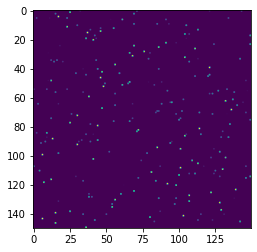

In [766]:
plt.imshow(transitions)

In [767]:
init = [1]+[0]*(NNODES-1)
np.array(init) 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [768]:
LEN = NNODES*10
PRINT_WALK = False

import base64

walk_pic = []
walk_transitions = []

node = get_state(init)

for state in walk(LEN, init, transitions):
    walk_pic.append(state)
    
    old_node = node
    node = get_state(state)
    walk_transitions.append([old_node, node])
    
    
    if PRINT_WALK:
        print(base64.b85encode(chr(node).encode()).decode(), end=' ')
        if node == 0:
            print()
        

walk_pic = np.array(walk_pic)
walk_transitions = np.array(walk_transitions)

(1500, 150)

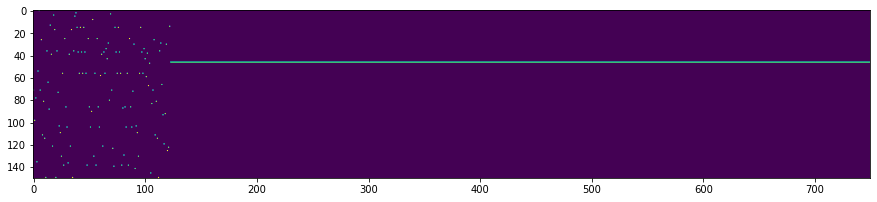

In [769]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

plt.imshow(walk_pic.transpose()[:, :NNODES*5])

walk_pic.shape

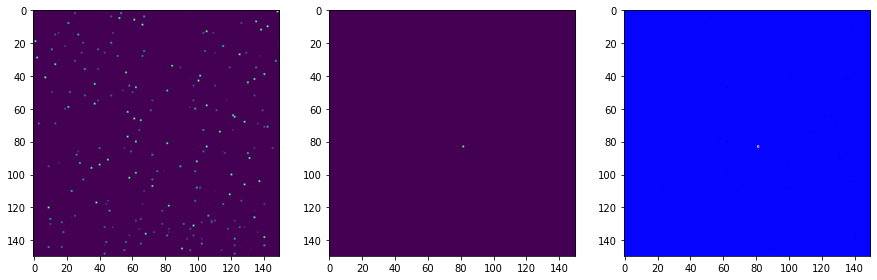

In [763]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# TODO compare to calulated stable distribution instead of transition matrix
axs[0].imshow(transitions/transitions.sum())


h, *_ = np.histogram2d(*walk_transitions.transpose(), bins=NNODES)

h = (h/h.sum())
axs[1].imshow(h)


axs[2].imshow(h-transitions/transitions.sum(), cmap="bwr")
